In [28]:
#Support vector machines (supervised)
from sklearn import svm
#Logistic Regression(supervised)
from sklearn.linear_model import LogisticRegression
#K-Means clustering (unsupervised)
from sklearn.cluster import KMeans
# Data sets
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

In [2]:
### Load dataset
data = pd.read_csv('car_data.csv')
data.head()

,name,year,selling_price,km_driven,mileage,engine,max_power
0,Maruti Swift Dzire VDI,2014,450000,145500,23.40,1248.0,74.00
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,21.14,1498.0,103.52
2,Honda City 2017-2020 EXi,2006,158000,140000,17.70,1497.0,78.00
3,Hyundai i20 Sportz Diesel,2010,225000,127000,23.00,1396.0,90.00
4,Maruti Swift VXI BSIII,2007,130000,120000,16.10,1298.0,88.20


In [16]:
## select the needed datapoint for independent and dependant variable
x = data.iloc[:, 2].values.reshape(-1,1)
y = data.iloc[:, 3].values.reshape(-1,1)

In [17]:
# Linear regression model  
LR = LinearRegression()
LR.fit(x,y)

LinearRegression()

In [18]:
#make predictions based on trained data
y_pred = LR.predict(x)
y_pred

array([[72287.33377729],
       [73527.95890037],
       [76815.61547653],
       ...,
       [73341.8651319 ],
       [74768.58402345],
       [74768.58402345]])

In [19]:
y_pred.shape

(7906, 1)

In [20]:
## put the outcome into a dataframe
pred=pd.DataFrame({'Actual_selling_price':y.flatten(), 'Predicted_selling_price':y_pred.flatten()})
pred

,Actual_selling_price,Predicted_selling_price
0,145500,72287.333777
1,120000,73527.958900
2,140000,76815.615477
3,127000,75776.591936
4,120000,77249.834270
...,...,...
7901,110000,74303.349602
7902,119000,77172.295199
7903,120000,73341.865132
7904,25000,74768.584023


<function matplotlib.pyplot.show(close=None, block=None)>

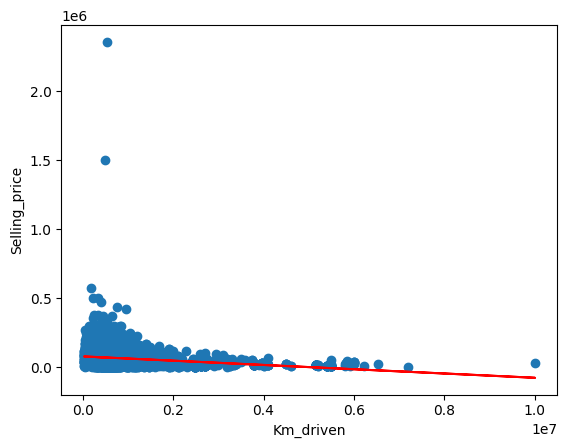

In [21]:
## scatter plot
plt.scatter(x,y)
plt.plot(x,y_pred, color = 'red')
plt.xlabel('Km_driven')
plt.ylabel('Selling_price')
plt.show

In [89]:
## the uni data set
#Import lasso and ridge
from sklearn.linear_model import Lasso , Ridge, RidgeCV
from sklearn.model_selection import RepeatedKFold
from sklearn import preprocessing


In [109]:
## load dataset
df = pd.read_csv('uni_data.csv')
df.head()

,institution,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,patents,score
0,Harvard University,1,7,9,1,1,1,1,5,100.00
1,Massachusetts Institute of Technology,2,9,17,3,12,4,4,1,91.67
2,Stanford University,3,17,11,5,4,2,2,15,89.50
3,University of Cambridge,1,10,24,4,16,16,11,50,86.17
4,California Institute of Technology,4,2,29,7,37,22,22,18,85.21


In [108]:
p = df.iloc[:,1:9].values
q = df.iloc[:,9].values

In [86]:
#Define our model
model_lasso= Lasso(alpha=0.001)
model_ridge= Ridge(alpha=0.001)

In [87]:
## fit our model
model_lasso.fit(p,q)
model_ridge.fit(p,q)

Ridge(alpha=0.001)

In [88]:
#prediction on model lasso and ridge
pred_lasso = model_lasso.predict(p)
pred_lasso

array([63.03630989, 62.86169765, 62.71622407, ..., 43.01959361,
       42.97716736, 42.87676377])

In [75]:
## make prediction i na dataframe
lasso_df = pd.DataFrame({'Actual_score':q, 'Predicted_score':pred_lasso})
lasso_df

,Actual_score,Predicted_score
0,100.00,62.983677
1,91.67,62.808617
2,89.50,62.665266
3,86.17,62.611186
4,85.21,62.458473
...,...,...
2195,44.03,42.962611
2196,44.03,43.367204
2197,44.03,43.002106
2198,44.02,42.970781


In [76]:
#prediction on model  ridge
pred_ridge = model_ridge.predict(p)
pred_ridge

array([63.03636232, 62.86175067, 62.71627481, ..., 43.01961093,
       42.9771734 , 42.87674215])

In [77]:
## make prediction i na dataframe
ridge_df = pd.DataFrame({'Actual_score':q, 'Predicted_score':pred_ridge})
ridge_df

,Actual_score,Predicted_score
0,100.00,63.036362
1,91.67,62.861751
2,89.50,62.716275
3,86.17,62.662853
4,85.21,62.510472
...,...,...
2195,44.03,43.001837
2196,44.03,43.409754
2197,44.03,43.019611
2198,44.02,42.977173


In [78]:
## define new data to predict
new = df.iloc[2199,1:9]
new

national_rank            83
quality_of_education    367
alumni_employment       567
quality_of_faculty      218
publications            861
influence               991
citations               812
patents                 547
Name: 2199, dtype: object

In [65]:
model_lasso.predict([new])

array([42.87695623848], dtype=object)

In [66]:
model_ridge.predict([new])

array([42.876742504312816], dtype=object)

In [81]:
## tuning alpha
cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=32)

## define the model
model = RidgeCV(alphas=(0.5,1,0.01), cv=cv, scoring='neg_mean_absolute_error')
model.fit(p,q)

RidgeCV(alphas=(0.5, 1, 0.01),
        cv=RepeatedKFold(n_repeats=5, n_splits=10, random_state=32),
        scoring='neg_mean_absolute_error')

In [82]:
model.alpha_

1.0